Importing libraries

In [107]:
import pandas as pd
import numpy as np
import joblib
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')


Loading Dataset

In [109]:
df = pd.read_csv("Crop.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
3595,9,18,36,28.691495,95.868935,7.120404,97.905497,pomegranate
3596,17,121,193,38.402065,79.401114,6.690311,62.934975,grapes
3597,2,75,19,29.074509,51.831678,6.329875,40.526652,lentil
3598,109,68,35,30.239436,79.064403,6.789040,101.799155,banana


EDA

In [111]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,51.081667,52.436667,48.292500,26.191647,71.322319,6.465113,99.128883
std,36.713386,32.986570,51.266442,4.897439,22.383840,0.747709,53.893666
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,27.000000,20.000000,23.389114,58.506791,5.988284,61.434036
50%,37.000000,50.000000,32.000000,26.336939,80.544357,6.458870,94.628289
75%,85.000000,67.000000,48.000000,29.109705,90.167750,6.932588,116.733481
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Check if there is any missing value

In [113]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

counting   Categories

In [115]:
df['label'].value_counts()


label
coffee         174
papaya         173
mungbean       173
maize          172
banana         171
grapes         170
lentil         168
apple          167
pigeonpeas     167
rice           166
jute           164
blackgram      163
orange         163
chickpea       162
coconut        162
muskmelon      161
mango          158
pomegranate    156
kidneybeans    156
mothbeans      152
cotton         152
watermelon     150
Name: count, dtype: int64

Data Visualization


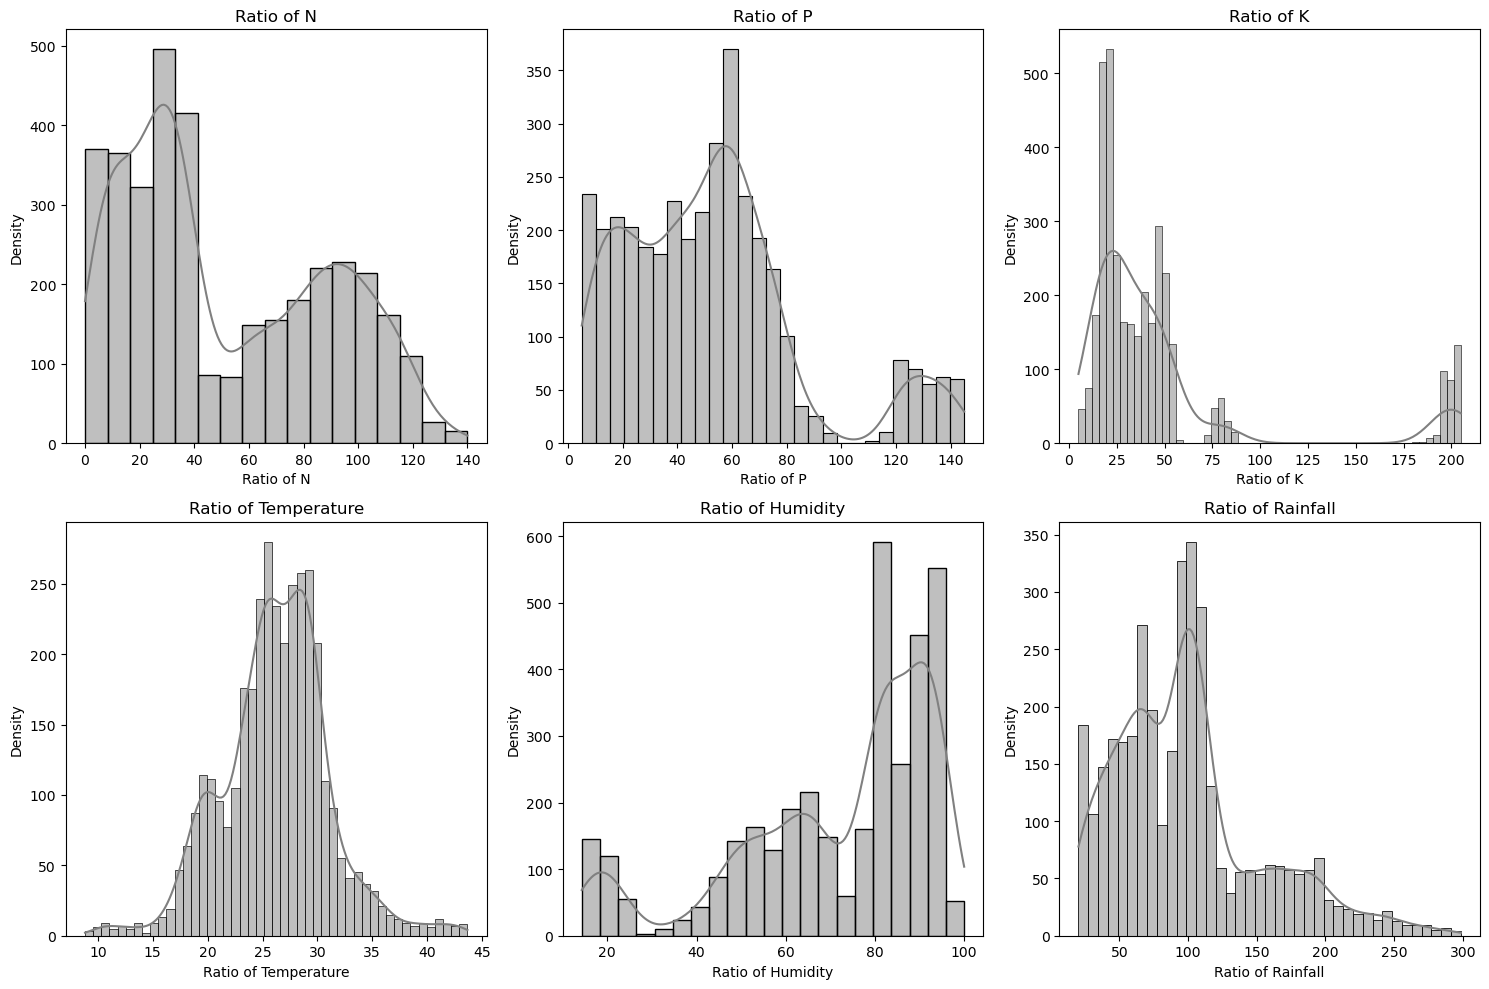

In [117]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='gray')
    axes[i].set_title(f'Ratio of {feature.capitalize()}')
    axes[i].set_xlabel(f'Ratio of {feature.capitalize()}')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

Observations: Nitrogen and phosphorus show bimodal distributions. Potassium is highly skewed to the left. Temperature distribution is approximately normal. Rainfall and humidity also show bimodal distributions.

The data reveals significant variability in soil and environmental conditions, with several variables (nitrogen, phosphorus, rainfall, humidity) showing bimodal distributions, indicating two distinct subgroups. Potassium ratios are highly skewed, suggesting most values are low with a few

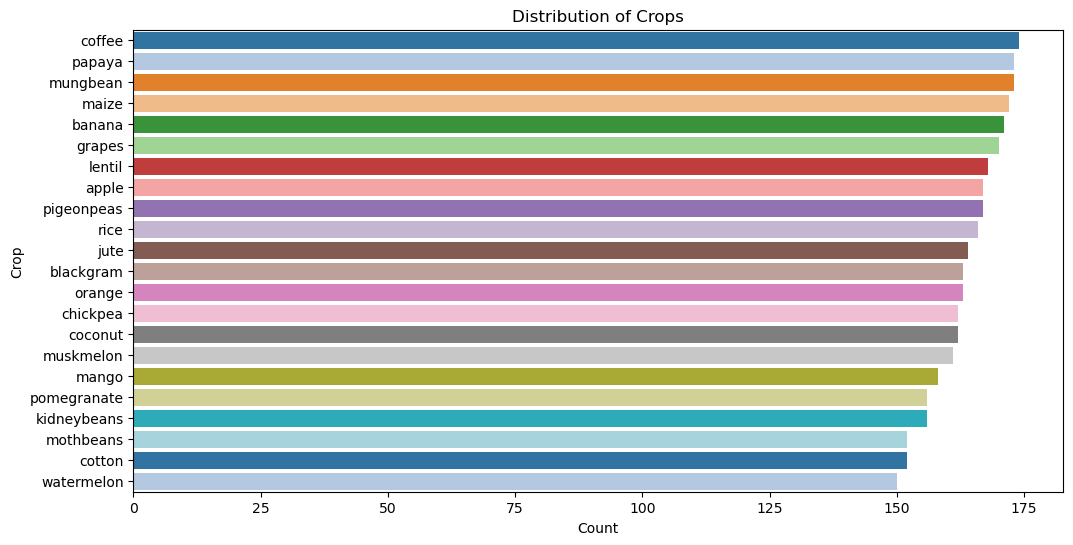

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='tab20')
plt.title('Distribution of Crops')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()

Observations: Shows the distribution of different crops in the dataset. Helps in understanding the representation of each crop.



# Checking values for individual crop


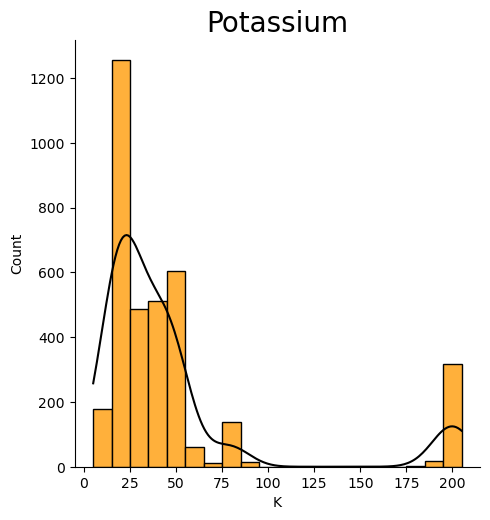

In [122]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

observation:The histogram of potassium (K) levels shows a highly skewed distribution with a large concentration of values between 0 and 50. There's a noticeable peak around 25 and a secondary, smaller peak near 200. The distribution indicates that most samples have low potassium levels, with relatively few having extremely high levels. The presence of these peaks suggests potential outliers or distinct subgroups within the data.

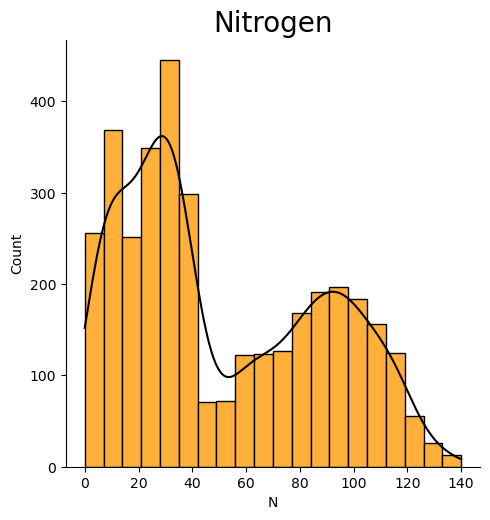

In [124]:
sns.displot(x=df['N'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Nitrogen",size=20)
plt.show()

observation:The histogram of nitrogen (N) levels shows a bimodal distribution with two distinct peaks. The first peak occurs around 20-40, indicating a large concentration of samples with low nitrogen levels. The second peak is around 90-100, showing a significant number of samples with higher nitrogen levels. There is a noticeable dip between 40 and 80, suggesting fewer samples in this range. This bimodal pattern indicates two distinct subgroups within the dataset based on nitrogen content.

# Crop accoding to Summer,Winter,Rainy


In [127]:
from IPython.display import display

def get_crop_info():
    # Define conditions for different types of crops
    summer_crops = df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique()
    winter_crops = df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique()
    rainy_crops = df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique()
    
    # Create a DataFrame with three columns: Summer Crops, Winter Crops, Rainy Crops
    max_length = max(len(summer_crops), len(winter_crops), len(rainy_crops))
    
    # Padding the lists with None to make them the same length
    summer_crops = np.pad(summer_crops, (0, max_length - len(summer_crops)), mode='constant', constant_values=None)
    winter_crops = np.pad(winter_crops, (0, max_length - len(winter_crops)), mode='constant', constant_values=None)
    rainy_crops = np.pad(rainy_crops, (0, max_length - len(rainy_crops)), mode='constant', constant_values=None)
    
    crops_df = pd.DataFrame({
        'Summer Crops': summer_crops,
        'Winter Crops': winter_crops,
        'Rainy Crops': rainy_crops
    })
    
    return crops_df

# Get the combined DataFrame
combined_df = get_crop_info()

# Display the combined DataFrame
display(combined_df)

,Summer Crops,Winter Crops,Rainy Crops
0,pigeonpeas,maize,rice
1,mothbeans,pigeonpeas,papaya
2,blackgram,lentil,coconut
3,mango,pomegranate,mungbean
4,grapes,grapes,pomegranate
5,orange,orange,coffee
6,papaya,apple,jute
7,watermelon,mango,None
8,rice,mothbeans,None
9,maize,blackgram,None


# Seasonal Crops


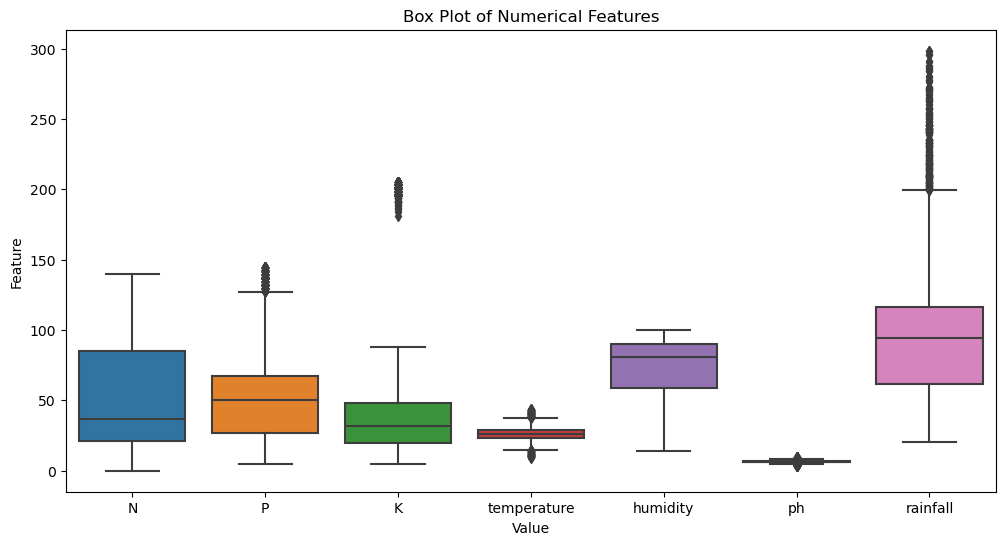

In [129]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['label']))
plt.title('Box Plot of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

Box Plot Observations
This box plot provides a summary of the distribution of various numerical features: Nitrogen (N), Phosphorus (P), Potassium (K), Temperature, Humidity, pH, and Rainfall. Each box represents the interquartile range (IQR) with the median marked inside the box, while the whiskers indicate the range of the data excluding outliers, which are represented by points outside the whiskers.

Nitrogen (N):
The median nitrogen value is around 50. The IQR ranges approximately from 25 to 75. There are no significant outliers beyond the whiskers.

Phosphorus (P):
The median phosphorus value is around 50. The IQR ranges from about 30 to 75. Numerous outliers are present above the upper whisker, indicating some samples with exceptionally high phosphorus levels.

Potassium (K):
The median potassium value is around 25. The IQR ranges from about 0 to 50. A few outliers are present above the upper whisker, though not as many as phosphorus.

Temperature:
The median temperature value is around 25. The IQR is very narrow, ranging approximately from 20 to 30. There are a few outliers on both the lower and upper ends, suggesting some extreme temperature values in the data.

Humidity:
The median humidity value is around 75. The IQR ranges from about 60 to 85. No significant outliers are present, indicating a consistent range of humidity values.

pH:
The median pH value is around 6.5. The IQR ranges from about 6 to 7. Several outliers are present, mostly on the lower end, suggesting some samples with unusually low pH levels.

Rainfall:
The median rainfall value is around 150. The IQR ranges from about 75 to 200. Numerous outliers are present above the upper whisker, indicating a wide variation in rainfall with some exceptionally high values.


# Implications for Agricultural Management:


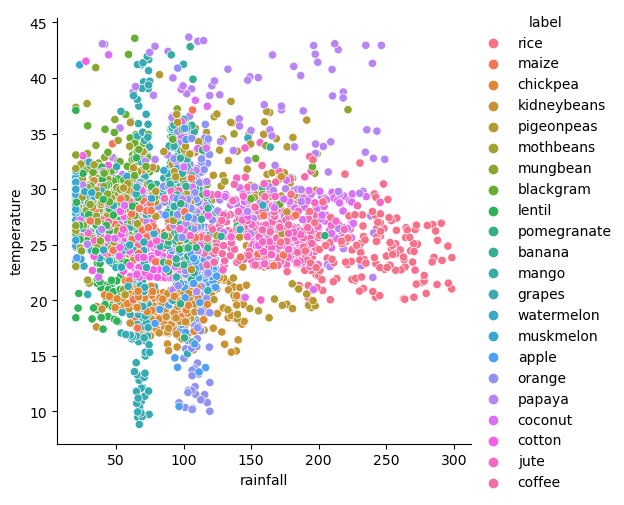

In [132]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

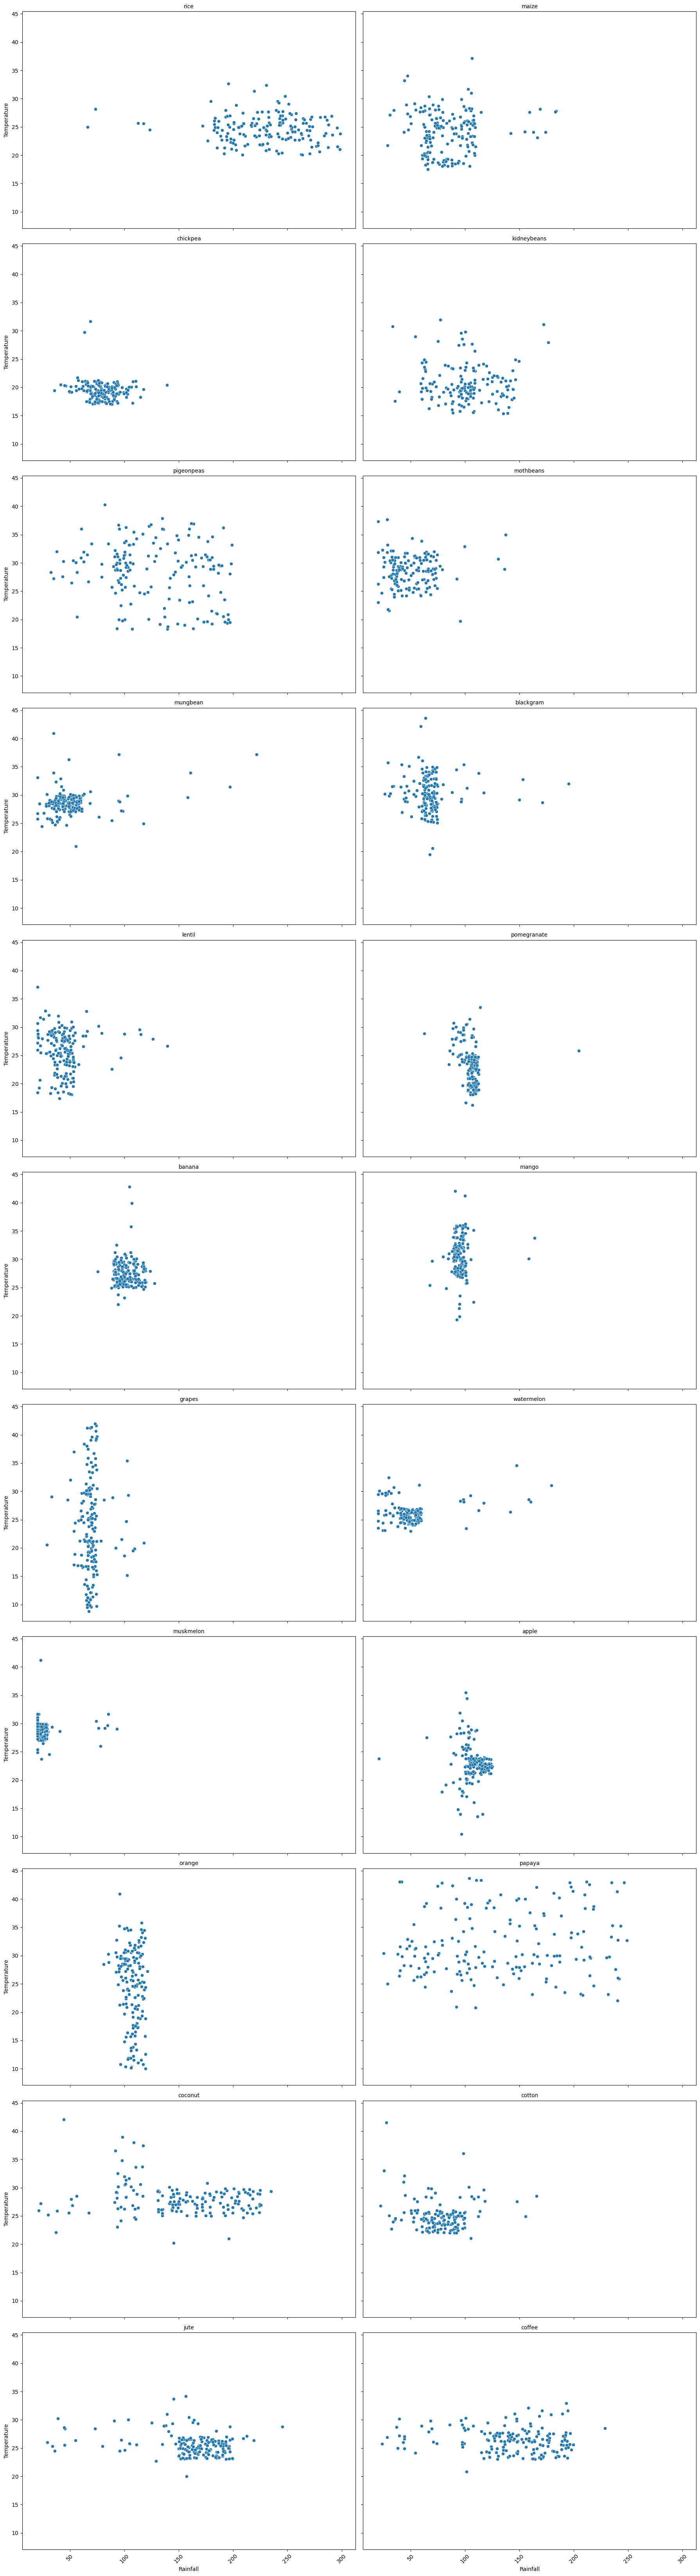

In [133]:
g = sns.FacetGrid(df, col="label", col_wrap=2,height=6, aspect=1.5,despine=False) 
g.map_dataframe(sns.scatterplot, x='rainfall', y='temperature')

# Add titles and display the plot
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Rainfall', 'Temperature')  # Ensure axis labels are set
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), visible=True)  # Ensure x-axis labels are set to visible
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Observations
General Trends:
There is a wide range of both temperature and rainfall values across the different crops, indicating diverse climatic requirements. Most data points are clustered between 50 and 200 mm of rainfall and 15 to 35°C.

Crop Clusters:
Rice (pink): Rice shows a wide range of rainfall from about 50 to 300 mm and temperatures mainly between 20 and 35°C.

Maize (orange): Maize is spread across a broad range of temperatures (15-35°C) and moderate rainfall (50-200 mm).

Chickpea (brown) and Kidneybeans (olive): These crops are mainly concentrated in lower rainfall areas (below 150 mm) and moderate temperatures (20-30°C).

Pigeonpeas (green) and Mothbeans (light green): These are found in lower to moderate rainfall regions (50-150 mm) with temperatures ranging between 20-35°C.

Mungbean (yellow-green) and Blackgram (lime): These crops are more common in moderate rainfall (50-150 mm) and a wide range of temperatures (15-35°C).

Banana (blue) and Pomegranate (turquoise): Both crops are in regions with moderate rainfall and temperatures mainly between 20 and 30°C.

Mango (cyan): Found in a broad range of temperatures (15-35°C) with lower to moderate rainfall (50-150 mm).

Grapes (light purple): These are found in lower rainfall areas (below 150 mm) and moderate temperatures (20-30°C).

Watermelon and Muskmelon (dark green and dark purple): Concentrated in lower rainfall areas (below 150 mm) with temperatures ranging from 20-35°C.

Apple (dark purple): Found in lower rainfall (below 150 mm) and a broader range of temperatures (10-25°C).

Orange (lavender): Concentrated in moderate rainfall areas (50-150 mm) with temperatures between 15-30°C.

Papaya, Coconut, and Cotton (purple, magenta, and light blue): Spread across a broad range of rainfall and temperatures, indicating adaptability to various conditions.

Jute and Coffee (light purple and grey): Found in moderate to high rainfall areas (100-250 mm) with temperatures around 20-30°C.

In [135]:
# removing the label column
x = df.drop(['label'],axis=1)

# selecting all the values of the data
x=x.values

# checking the shape
print(x.shape)

(3600, 7)


In [136]:
y = df['label']
x = df.drop(['label'],axis = 1)
print(x.shape)
print(y.shape)

(3600, 7)
(3600,)


# Data split into training and testing


In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,N,P,K,temperature,humidity,ph,rainfall
2964,23,60,24,23.962126,83.318993,6.774486,52.463929
701,25,62,21,26.734340,68.139997,7.040056,67.150964
2278,79,53,17,28.632218,63.496236,7.311004,98.892553
1366,120,7,47,24.247825,83.036879,6.653868,54.765762
2797,121,81,48,30.074137,79.978167,6.196065,111.238545
...,...,...,...,...,...,...,...
835,39,65,23,25.434598,69.126134,7.685959,41.026829
3264,27,128,200,22.809010,92.941175,5.743695,87.052904
1653,14,22,9,17.249446,91.137728,6.543192,112.509052
2607,11,56,29,29.683305,51.010443,4.385585,69.704139


# Feature Scaling

In [140]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training data
scaler.fit(x_train)

# Transform training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-0.76536262,  0.2316484 , -0.47222755, ...,  0.52775366,
         0.40699797, -0.87110056],
       [-0.7106708 ,  0.29210853, -0.53051309, ..., -0.15455445,
         0.76508046, -0.60152074],
       [ 0.76600829,  0.02003792, -0.60822715, ..., -0.36329524,
         1.13041419, -0.01890539],
       ...,
       [-1.0114758 , -0.9170942 , -0.76365525, ...,  0.87921208,
         0.0951304 ,  0.2310248 ],
       [-1.09351353,  0.11072812, -0.37508499, ..., -0.92454171,
        -2.8140928 , -0.55465732],
       [-0.62863308,  0.08049805, -0.62765566, ..., -1.25274745,
         1.35210044,  0.06320648]])

In [141]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer

# Initialize the scalers
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()

# Apply scaling to the training and testing data
x_train_scaled_minmax = min_max_scaler.fit_transform(x_train)
x_test_scaled_minmax = min_max_scaler.transform(x_test)

x_train_scaled_robust = robust_scaler.fit_transform(x_train)
x_test_scaled_robust = robust_scaler.transform(x_test)

x_train_scaled_normalized = normalizer.fit_transform(x_train)
x_test_scaled_normalized = normalizer.transform(x_test)

# Model building


In [143]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [144]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy*100,"%")

Accuracy of Logistic Regression: 87.36111111111111 %


In [145]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.90      0.97      0.94        37
   blackgram       0.70      0.70      0.70        33
    chickpea       1.00      1.00      1.00        37
     coconut       0.90      0.72      0.80        25
      coffee       0.83      0.89      0.86        28
      cotton       0.86      0.83      0.85        30
      grapes       1.00      1.00      1.00        34
        jute       0.80      0.73      0.76        33
 kidneybeans       0.97      0.97      0.97        34
      lentil       0.76      0.86      0.81        29
       maize       0.90      0.85      0.88        33
       mango       0.94      1.00      0.97        30
   mothbeans       0.76      0.68      0.71        37
    mungbean       0.89      0.89      0.89        36
   muskmelon       0.90      0.81      0.85        32
      orange       0.86      0.97      0.91        31
      papaya       0.97    

In [146]:
pred = model.predict(np.array(np.array([[99,15,27,27,56,6,200]])))
print(pred)


['rice']


# Classifiers Comparison

In [148]:

# Define the parameter grids for each classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30, 40, 50]}
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Define parameter grids for classifiers
param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "SVM": param_grid_svm
}

# Train and evaluate classifiers with GridSearchCV
results = {}
results_cv = {}  # Dictionary to store mean cross-validation scores

for name, clf in classifiers.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[name] = {
        "best_params": best_params,
        "best_estimator": best_estimator,
        "accuracy": accuracy,
        "classification_report": cr
    }
    
    # Store the mean cross-validation score
    results_cv[name] = {
        "cross_validation_mean_score": grid_search.best_score_
    }




# Print out the results and plot the confusion matrix heatmap
for name, result in results.items():
    print("Results for", name)
    print("Best Parameters:", result["best_params"])
    print("Accuracy:", result["accuracy"])
    print("Classification Report:")
    print(result["classification_report"])
    print("\n")




Results for Logistic Regression
Best Parameters: {'C': 100}
Accuracy: 0.8875
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.95      0.97      0.96        37
   blackgram       0.73      0.73      0.73        33
    chickpea       1.00      1.00      1.00        37
     coconut       0.95      0.80      0.87        25
      coffee       0.83      0.89      0.86        28
      cotton       0.84      0.90      0.87        30
      grapes       1.00      1.00      1.00        34
        jute       0.83      0.73      0.77        33
 kidneybeans       1.00      0.97      0.99        34
      lentil       0.83      0.86      0.85        29
       maize       0.83      0.88      0.85        33
       mango       0.94      1.00      0.97        30
   mothbeans       0.83      0.68      0.75        37
    mungbean       0.86      0.86      0.86        36
   muskmelon       0.93      0.84  

In [149]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply PCA only to Random Forest (retain 95% variance)
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)



In [150]:
random_forest = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30, 40, 50]}

# Perform GridSearchCV for Random Forest on PCA-transformed data
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train_pca, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test_pca)
y_pred_rf


array(['watermelon', 'banana', 'blackgram', 'banana', 'mungbean',
       'watermelon', 'mungbean', 'pigeonpeas', 'mungbean', 'lentil',
       'maize', 'blackgram', 'lentil', 'mungbean', 'watermelon', 'jute',
       'mungbean', 'mango', 'kidneybeans', 'lentil', 'maize',
       'pomegranate', 'kidneybeans', 'lentil', 'cotton', 'muskmelon',
       'mothbeans', 'lentil', 'mothbeans', 'papaya', 'mango', 'mothbeans',
       'chickpea', 'banana', 'orange', 'mango', 'jute', 'jute', 'rice',
       'orange', 'cotton', 'blackgram', 'banana', 'pomegranate', 'apple',
       'pomegranate', 'chickpea', 'blackgram', 'chickpea', 'orange',
       'cotton', 'grapes', 'coffee', 'coffee', 'pomegranate',
       'watermelon', 'mango', 'watermelon', 'kidneybeans', 'coffee',
       'blackgram', 'muskmelon', 'mothbeans', 'jute', 'apple', 'mungbean',
       'apple', 'chickpea', 'pigeonpeas', 'banana', 'blackgram',
       'mothbeans', 'grapes', 'chickpea', 'papaya', 'blackgram', 'lentil',
       'apple', 'mungbea

<Figure size 1200x800 with 0 Axes>

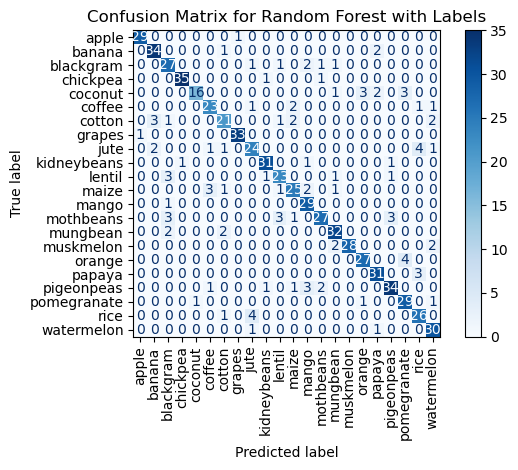

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = np.unique(y_test)
plt.figure(figsize=(12, 8))  



disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp.plot(cmap='Blues')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.title("Confusion Matrix for Random Forest with Labels")
plt.tight_layout()  # Ensure the layout is not cut off
plt.show()

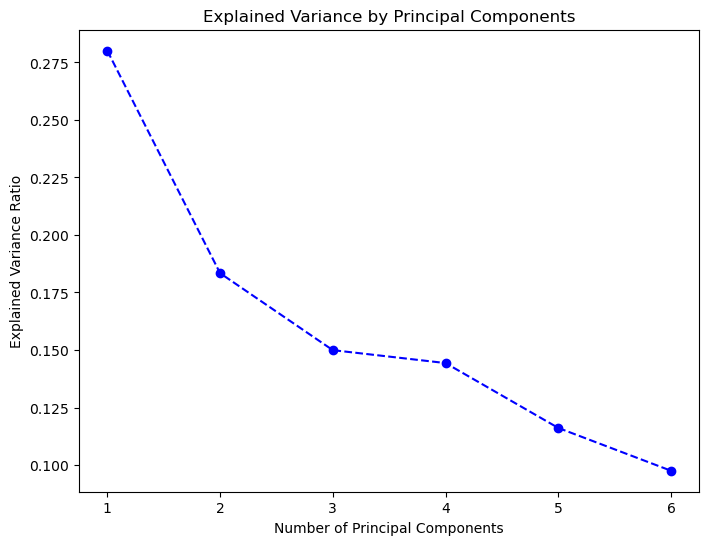

In [152]:
def plot_explained_variance(pca):
    plt.figure(figsize=(8,6))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

# Plot explained variance for PCA
plot_explained_variance(pca)

- The first principal component explains the largest portion of variance, around 27.5%. This suggests that the first component captures the most important pattern or variation in the dataset.
- After the first few components, the variance explained by subsequent components decreases steadily. By the time we reach the 6th component, each component is explaining less than 10% of the variance.
- so it can comfortably reduce the dimensionality to about 3-4 components, which will allow to keep most of the data’s variability with fewer dimensions, making your model or analysis more efficient and potentially reducing overfitting.

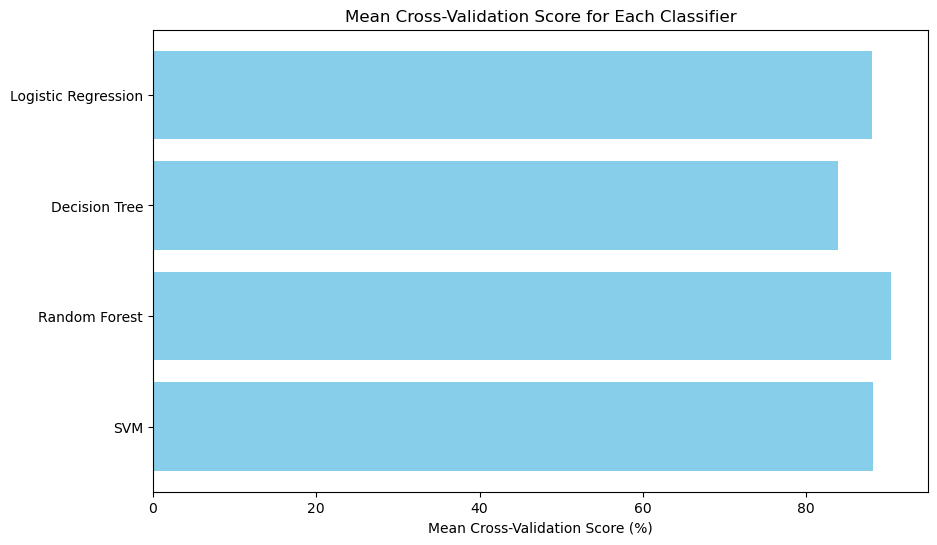

In [154]:
# Extract mean cross-validation scores for each classifier
classifiers_names = list(results_cv.keys())
cv_scores_mean = [results_cv[name]["cross_validation_mean_score"] * 100 for name in classifiers_names]  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(classifiers_names, cv_scores_mean, color='skyblue')
plt.xlabel('Mean Cross-Validation Score (%)')  # Update xlabel to indicate percentage
plt.title('Mean Cross-Validation Score for Each Classifier')
plt.gca().invert_yaxis()  
plt.show()



Random Forest also shows a high mean cross-validation score, slightly more than Logistic Regression, suggesting that it is a strong performer and potentially more robust due to its ensemble nature.

SVM (Support Vector Machine) comes next, with a mean cross-validation score comparable to Random Forest but slightly lower.

Decision Tree has the lowest mean cross-validation score among the classifiers, suggesting that it might not be as effective as the other methods in this context.

In [156]:
# Select 5 random indices from the test set
random_indices = np.random.choice(range(len(x_test_scaled)), size=5, replace=False)

# Extract the corresponding test samples and true labels
random_samples = x_test_scaled[random_indices]
actual_labels = y_test.values[random_indices]  # Convert y_test to numpy array before indexing

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Actual', 'Predicted'])

# Predict using each trained model and store the results
for name, clf in classifiers.items():
    best_estimator = results[name]['best_estimator']
    predictions = best_estimator.predict(random_samples)
    
    for idx, actual, predicted in zip(random_indices, actual_labels, predictions):
        row = pd.DataFrame({
            'Model': [name],
            'Actual': [actual],
            'Predicted': [predicted]
        })
        results_df = pd.concat([results_df, row], ignore_index=True)

# Display the DataFrame
results_df

,Model,Actual,Predicted
0,Logistic Regression,watermelon,watermelon
1,Logistic Regression,banana,banana
2,Logistic Regression,blackgram,blackgram
3,Logistic Regression,mungbean,mungbean
4,Logistic Regression,blackgram,blackgram
5,Decision Tree,watermelon,watermelon
6,Decision Tree,banana,banana
7,Decision Tree,blackgram,mungbean
8,Decision Tree,mungbean,mungbean
9,Decision Tree,blackgram,blackgram
